# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pickle
%matplotlib inline
import seaborn as sns
from scipy.io import arff
import pandas
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, LSTM, GRU, MaxPool1D, SimpleRNN, Flatten, Dropout, Conv1D
import tensorflow.keras.backend as K

# Importing Dataset

In [3]:
data = pd.read_csv('Dataset/dataset.csv')

# EDA

In [4]:
data = data.drop(['index'], axis =1)
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [6]:
data = data.applymap(lambda x: np.nan if x == '?' else x)

In [7]:
data.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [8]:
data.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

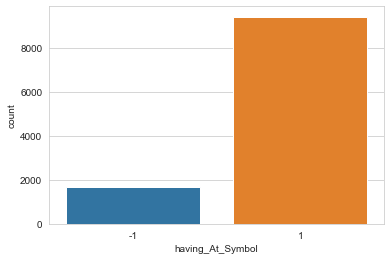

In [9]:
df = data
sns.set_style('whitegrid')
sns.countplot(x='having_At_Symbol',data=df)

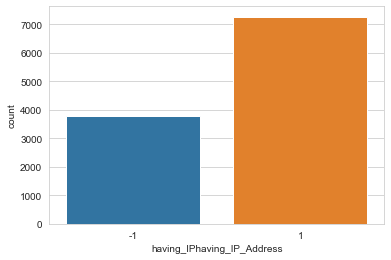

In [10]:
sns.countplot(x='having_IPhaving_IP_Address',data=df)

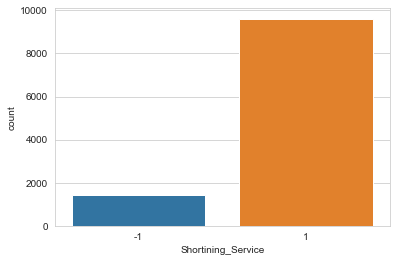

In [11]:
sns.countplot(x='Shortining_Service', data=df)

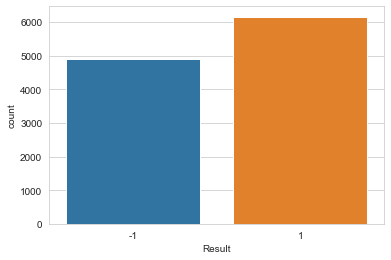

In [12]:
sns.countplot(x='Result', data=df)

# Model Building

In [13]:
X = data.drop(["Result"],axis =1)
y = data["Result"]

In [14]:
y_data = LabelBinarizer().fit_transform(y)

X=np.array(X)
y=np.array(y)

if y.dtype == np.dtype('O'):
    y = y.astype(float)
    
if X.dtype == np.dtype('O'):
    X = X.astype(float)

# CNN

In [15]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(8844, 30) 
 (2211, 30)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(2211, 30, 1)

In [18]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [19]:
y_train = LabelBinarizer().fit_transform(y_train)
y_train
y_test = LabelBinarizer().fit_transform(y_test)
y_test

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [20]:
model = Sequential() 
model.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))  
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))
model.add(Dense(units=2,activation='softmax'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, recall_m, precision_m])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 32)             0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 32)             3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
111/111 [==============================] - 38s 11ms/step - loss: 0.0624 - accuracy: 0.9907 - f1_score: 0.9907 - recall_m: 0.9907 - precision_m: 0.9907 - val_loss: 3.9186e-04 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_recall_m: 1.0000 - val_precision_m: 1.0000
Epoch 2/10
111/111 [==============================] - 1s 5ms/step - loss: 3.3352e-04 - accuracy: 1.0000 - f1_score: 1.0000 - recall_m: 1.0000 - precision_m: 1.0000 - val_loss: 1.0644e-04 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_recall_m: 1.0000 - val_precision_m: 1.0000
Epoch 3/10
111/111 [==============================] - 1s 5ms/step - loss: 1.4079e-04 - accuracy: 1.0000 - f1_score: 1.0000 - recall_m: 1.0000 - precision_m: 1.0000 - val_loss: 4.5734e-05 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_recall_m: 1.0000 - val_precision_m: 1.0000
Epoch 4/10
111/111 [==============================] - 1s 5ms/step - loss: 8.3596e-05 - accuracy: 1.0000 - f1_score: 1.0000 - recall_m: 1.0000 - precision_m:

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels)
recall = recall_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels)

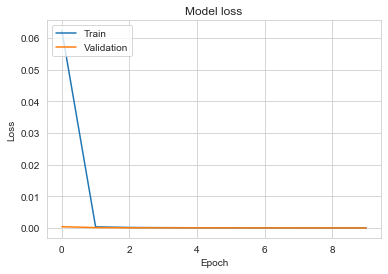

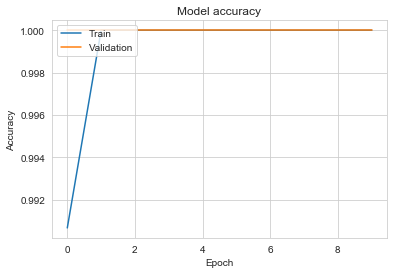

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# RNN

In [25]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)


X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))



y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

(8844, 30) 
 (2211, 30)


In [27]:
model = Sequential() 
model.add(SimpleRNN(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
model.add(Dense(units=2,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, recall_m, precision_m])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1, 64)             6080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 1, 64)             8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 1, 64)             8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [29]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
111/111 [==============================] - 3s 12ms/step - loss: 0.0598 - accuracy: 0.9731 - f1_score: 0.9733 - recall_m: 0.9733 - precision_m: 0.9733 - val_loss: 0.0040 - val_accuracy: 0.9983 - val_f1_score: 0.9983 - val_recall_m: 0.9983 - val_precision_m: 0.9983
Epoch 2/10
111/111 [==============================] - 1s 8ms/step - loss: 0.0044 - accuracy: 0.9989 - f1_score: 0.9989 - recall_m: 0.9989 - precision_m: 0.9989 - val_loss: 9.2699e-04 - val_accuracy: 0.9994 - val_f1_score: 0.9994 - val_recall_m: 0.9994 - val_precision_m: 0.9994
Epoch 3/10
111/111 [==============================] - 1s 8ms/step - loss: 0.0012 - accuracy: 0.9997 - f1_score: 0.9997 - recall_m: 0.9997 - precision_m: 0.9997 - val_loss: 3.1074e-04 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_recall_m: 1.0000 - val_precision_m: 1.0000
Epoch 4/10
111/111 [==============================] - 1s 8ms/step - loss: 7.8032e-04 - accuracy: 0.9999 - f1_score: 0.9999 - recall_m: 0.9999 - precision_m: 0.9999 - val

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)


y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy1 = accuracy_score(y_test_labels, y_pred_labels)
precision1 = precision_score(y_test_labels, y_pred_labels)
recall1 = recall_score(y_test_labels, y_pred_labels)
f11 = f1_score(y_test_labels, y_pred_labels)

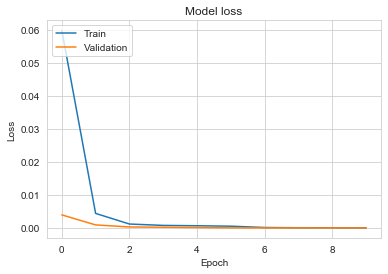

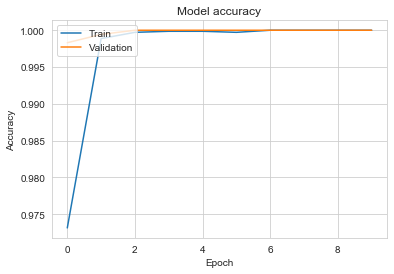

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Logistic Regression

In [32]:
X = data.drop(["Result"],axis =1)
y = data["Result"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
val = (accuracy_score(y_test, predictions))
print("*Accuracy score for LR: ", val, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))

*Accuracy score for LR:  0.9240162822252375 

*Confusion Matrix for LR: 
[[ 864   92]
 [  76 1179]]
*Classification Report for LR: 
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [34]:
lr_prec = precision_score(y_test, predictions,average='weighted')
lr_rec = recall_score(y_test, predictions,average='weighted')
lr_f1 = f1_score(y_test, predictions,average='weighted')

kf = KFold(n_splits=10)

score_lr  = cross_val_score(LR, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score_lr}')
print(f'Average score: {"{:.2f}".format(score_lr.mean())}')

Scores for each fold are: [0.91186441 0.93559322 0.93333333 0.90960452 0.93099548 0.92081448
 0.93891403 0.92986425 0.93778281 0.93552036]
Average score: 0.93


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
val1 = (accuracy_score(y_test, predictions))
print("*Accuracy score for DT: ", val1, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))

*Accuracy score for DT:  0.9140660334690185 

*Confusion Matrix for DT: 
[[ 865   91]
 [  99 1156]]
*Classification Report for DT: 
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       956
           1       0.93      0.92      0.92      1255

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



In [36]:
dt_prec = precision_score(y_test, predictions,average='weighted')
dt_rec = recall_score(y_test, predictions,average='weighted')
dt_f1 = f1_score(y_test, predictions,average='weighted')

kf = KFold(n_splits=10)

score_dt = cross_val_score(DT, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score_dt}')
print(f'Average score: {"{:.2f}".format(score_dt.mean())}')

Scores for each fold are: [0.8960452  0.91638418 0.88926554 0.89830508 0.88800905 0.90497738
 0.90837104 0.92081448 0.90271493 0.89819005]
Average score: 0.90


# SVM

In [37]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val2 = (accuracy_score(y_test, predictions))
print("*Accuracy score for SVM: ", val2, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  0.9470827679782904 

*Confusion Matrix for SVM: 
[[ 882   74]
 [  43 1212]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

          -1       0.95      0.92      0.94       956
           1       0.94      0.97      0.95      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.94      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [38]:
svm_prec = precision_score(y_test, predictions,average='weighted')
svm_rec = recall_score(y_test, predictions,average='weighted')
svm_f1 = f1_score(y_test, predictions,average='weighted')

kf = KFold(n_splits=10)

score_svm = cross_val_score(SVM, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score_svm}')
print(f'Average score: {"{:.2f}".format(score_svm.mean())}')

Scores for each fold are: [0.93220339 0.95367232 0.94576271 0.94350282 0.95022624 0.94343891
 0.95701357 0.95248869 0.95135747 0.95361991]
Average score: 0.95


## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
val3 = (accuracy_score(y_test, predictions))
print("*Accuracy score for KNN: ", val3, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  0.9466304839439168 

*Confusion Matrix for KNN: 
[[ 884   72]
 [  46 1209]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

          -1       0.95      0.92      0.94       956
           1       0.94      0.96      0.95      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.94      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [40]:
knn_prec = precision_score(y_test, predictions,average='weighted')
knn_rec = recall_score(y_test, predictions,average='weighted')
knn_f1 = f1_score(y_test, predictions,average='weighted')

kf = KFold(n_splits=10)

score_knn = cross_val_score(KNN, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score_knn}')
print(f'Average score: {"{:.2f}".format(score_knn.mean())}')

Scores for each fold are: [0.94124294 0.95367232 0.94915254 0.94689266 0.95475113 0.93778281
 0.94117647 0.94457014 0.96040724 0.94230769]
Average score: 0.95


# Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
predictions = NB.predict(X_test)
val4 = (accuracy_score(y_test, predictions))
print("*Accuracy score for NB: ", val4, "\n")
print("*Confusion Matrix for NB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for NB: ")
print(classification_report(y_test, predictions))

*Accuracy score for NB:  0.5829941203075532 

*Confusion Matrix for NB: 
[[955   1]
 [921 334]]
*Classification Report for NB: 
              precision    recall  f1-score   support

          -1       0.51      1.00      0.67       956
           1       1.00      0.27      0.42      1255

    accuracy                           0.58      2211
   macro avg       0.75      0.63      0.55      2211
weighted avg       0.79      0.58      0.53      2211



In [42]:
nb_prec = precision_score(y_test, predictions,average='weighted')
nb_rec = recall_score(y_test, predictions,average='weighted')
nb_f1 = f1_score(y_test, predictions,average='weighted')

kf = KFold(n_splits=10)

score_gn = cross_val_score(NB, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score_gn}')
print(f'Average score: {"{:.2f}".format(score_gn.mean())}')

Scores for each fold are: [0.60112994 0.58644068 0.60903955 0.62372881 0.60180995 0.59728507
 0.62330317 0.60859729 0.60972851 0.60633484]
Average score: 0.61


# LDA

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
predictions = LDA.predict(X_test)
val5 = (accuracy_score(y_test, predictions))
print("*Accuracy score for LDA: ", val5, "\n")
print("*Confusion Matrix for LDA: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LDA: ")
print(classification_report(y_test, predictions))

*Accuracy score for LDA:  0.9208502939846224 

*Confusion Matrix for LDA: 
[[ 846  110]
 [  65 1190]]
*Classification Report for LDA: 
              precision    recall  f1-score   support

          -1       0.93      0.88      0.91       956
           1       0.92      0.95      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [44]:
lda_prec = precision_score(y_test, predictions,average='weighted')
lda_rec = recall_score(y_test, predictions,average='weighted')
lda_f1 = f1_score(y_test, predictions,average='weighted')
kf = KFold(n_splits=10)
score_lda = cross_val_score(LDA, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score_lda}')
print(f'Average score: {"{:.2f}".format(score_lda.mean())}')

Scores for each fold are: [0.91299435 0.93107345 0.9220339  0.90960452 0.91289593 0.92307692
 0.9321267  0.91855204 0.92760181 0.9219457 ]
Average score: 0.92


# Extension

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('nb', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

val6 = (accuracy_score(y_test, predictions))
print("*Accuracy score for Voting: ", val6, "\n")
print("*Classification Report for Voting: ")
print(classification_report(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[ 904   52]
 [  39 1216]]
*Accuracy score for Voting:  0.9588421528720036 

*Classification Report for Voting: 
              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [46]:
vot_prec = precision_score(y_test, predictions,average='weighted')
vot_rec = recall_score(y_test, predictions,average='weighted')
vot_f1 = f1_score(y_test, predictions,average='weighted')
kf = KFold(n_splits=10)
score_voting = cross_val_score(eclf1, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score_voting}')
print(f'Average score: {"{:.2f}".format(score_voting.mean())}')

Scores for each fold are: [0.95932203 0.96497175 0.96497175 0.97853107 0.96493213 0.96606335
 0.96153846 0.95135747 0.97737557 0.9479638 ]
Average score: 0.96


# Comparison

In [47]:
score = [accuracy,accuracy1,val,val1,val2,val3,val4,val5,val6]
score1 = [precision,precision1,lr_prec,dt_prec,svm_prec,knn_prec,nb_prec,lda_prec,vot_prec]
score2 = [recall,recall1,lr_rec,dt_rec,svm_rec,knn_rec,nb_rec,lda_rec,vot_rec]
score3 = [f1,f11,lr_f1,dt_f1,svm_f1,knn_f1,nb_f1,lda_f1,vot_f1]

In [48]:
classifier = ('CNN','RNN','Logistic Regression','Decision Tree','SVM','KNN','Naive Bayes','LDA','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)
        

results = {
    'Accuracy': score,
    'Recall': score1,
    'Precision': score2,
    'F1': score3
}

index = ['CNN','RNN','Logistic Regression','Decision Tree','SVM','KNN','Naive Bayes','LDA','Voting Classifier']

[0 1 2 3 4 5 6 7 8]
[1.0, 1.0, 0.9240162822252375, 0.9140660334690185, 0.9470827679782904, 0.9466304839439168, 0.5829941203075532, 0.9208502939846224, 0.9588421528720036]


In [49]:
results =pd.DataFrame(results,index=index)
print(results)

                     Accuracy    Recall  Precision        F1
CNN                  1.000000  1.000000   1.000000  1.000000
RNN                  1.000000  1.000000   1.000000  1.000000
Logistic Regression  0.924016  0.923955   0.924016  0.923936
Decision Tree        0.914066  0.914174   0.914066  0.914108
SVM                  0.947083  0.947238   0.947083  0.946970
KNN                  0.946630  0.946710   0.946630  0.946536
Naive Bayes          0.582994  0.786032   0.582994  0.530085
LDA                  0.920850  0.921120   0.920850  0.920593
Voting Classifier    0.958842  0.958840   0.958842  0.958807


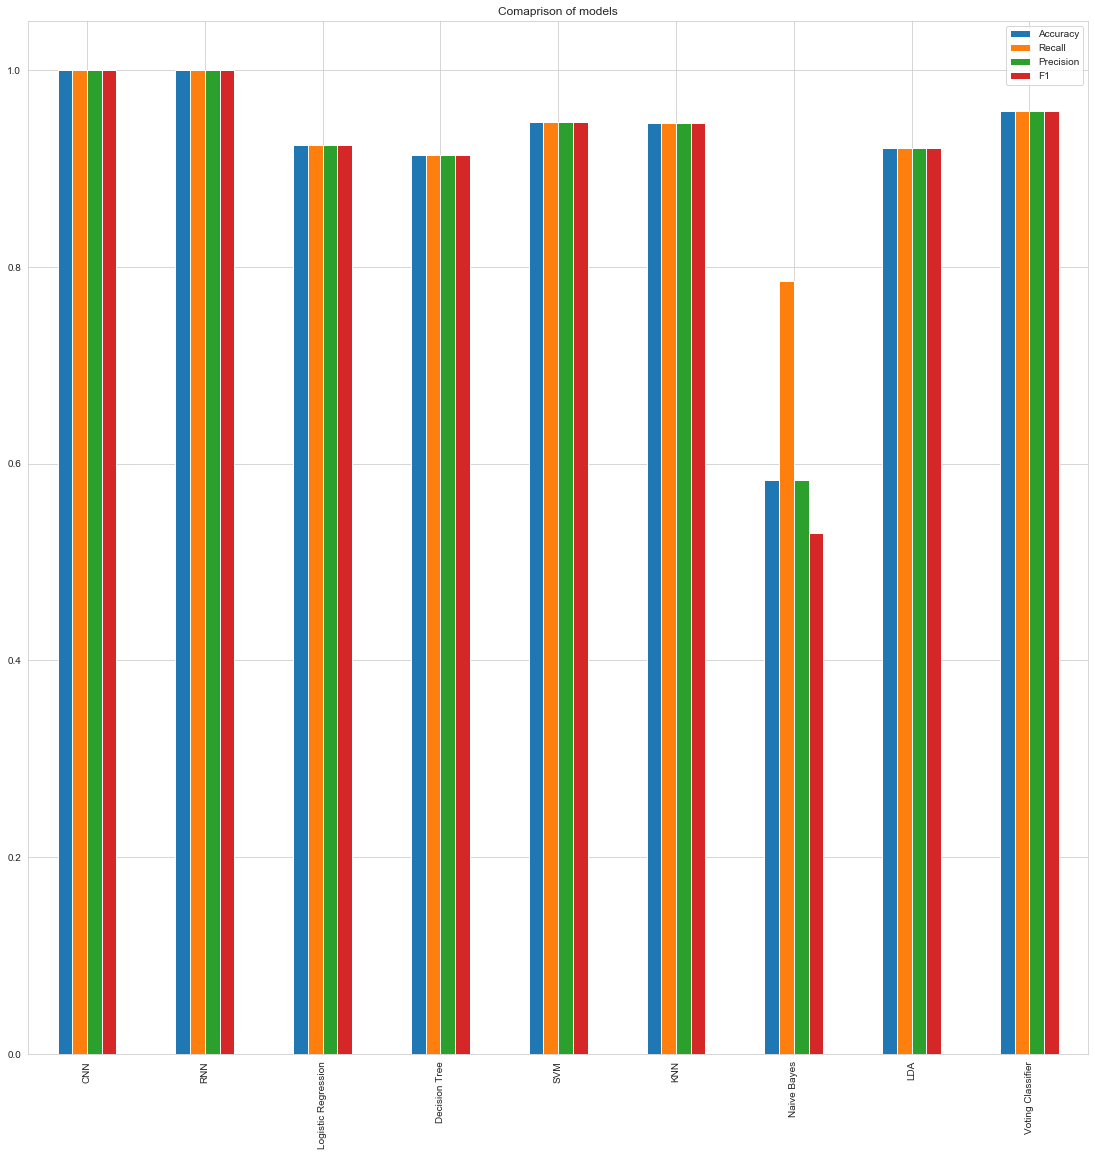

In [50]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result1.png')

# Accuracy

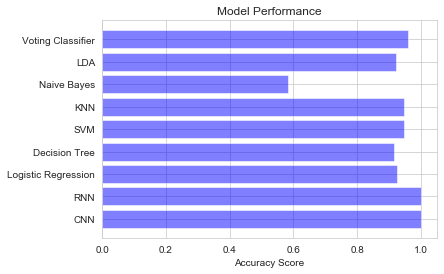

In [51]:
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Model Performance')
plt2.show()

# Precision

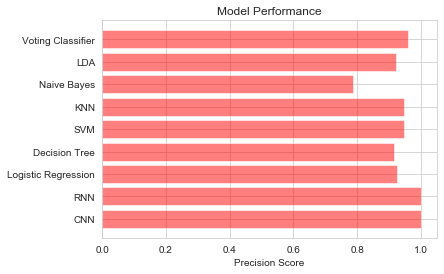

In [52]:
plt2.barh(y_pos, score1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Model Performance')
plt2.show()

# Recall

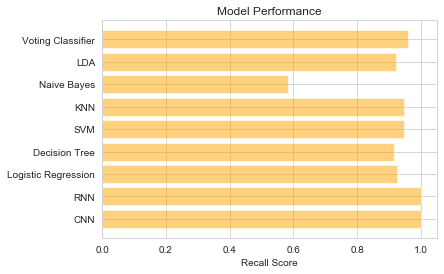

In [53]:
plt2.barh(y_pos, score2, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Model Performance')
plt2.show()

# F1 Score

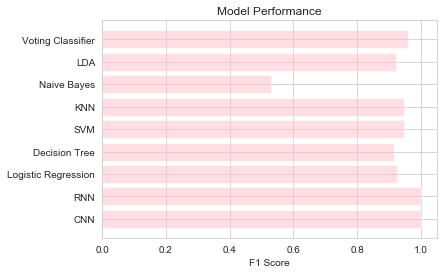

In [54]:
plt2.barh(y_pos, score3, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Model Performance')
plt2.show()

# Saving the model

In [55]:
pickle.dump(eclf1,open('model_2.pkl','wb'))